In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
csv_file = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
os.path.exists(csv_file)

True

In [3]:
df = pd.read_csv(csv_file)

In [35]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,179,179,179,179,180,180,183,183,183,183
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,26,26,27,28,30,30,30,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,4620,4915,4985,5046,5185,5329,5352,5536,5690,5811
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,71,71,71,71,71,72,72,72,72,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,42,45,46,51,48,50,54,61,70,75
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,26,26,26,26,28,28,28,28,29,29
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,554,584,616,637,655,680,718,739,780,806
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,20,20,22,22,22,23,27,27,29,30


Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


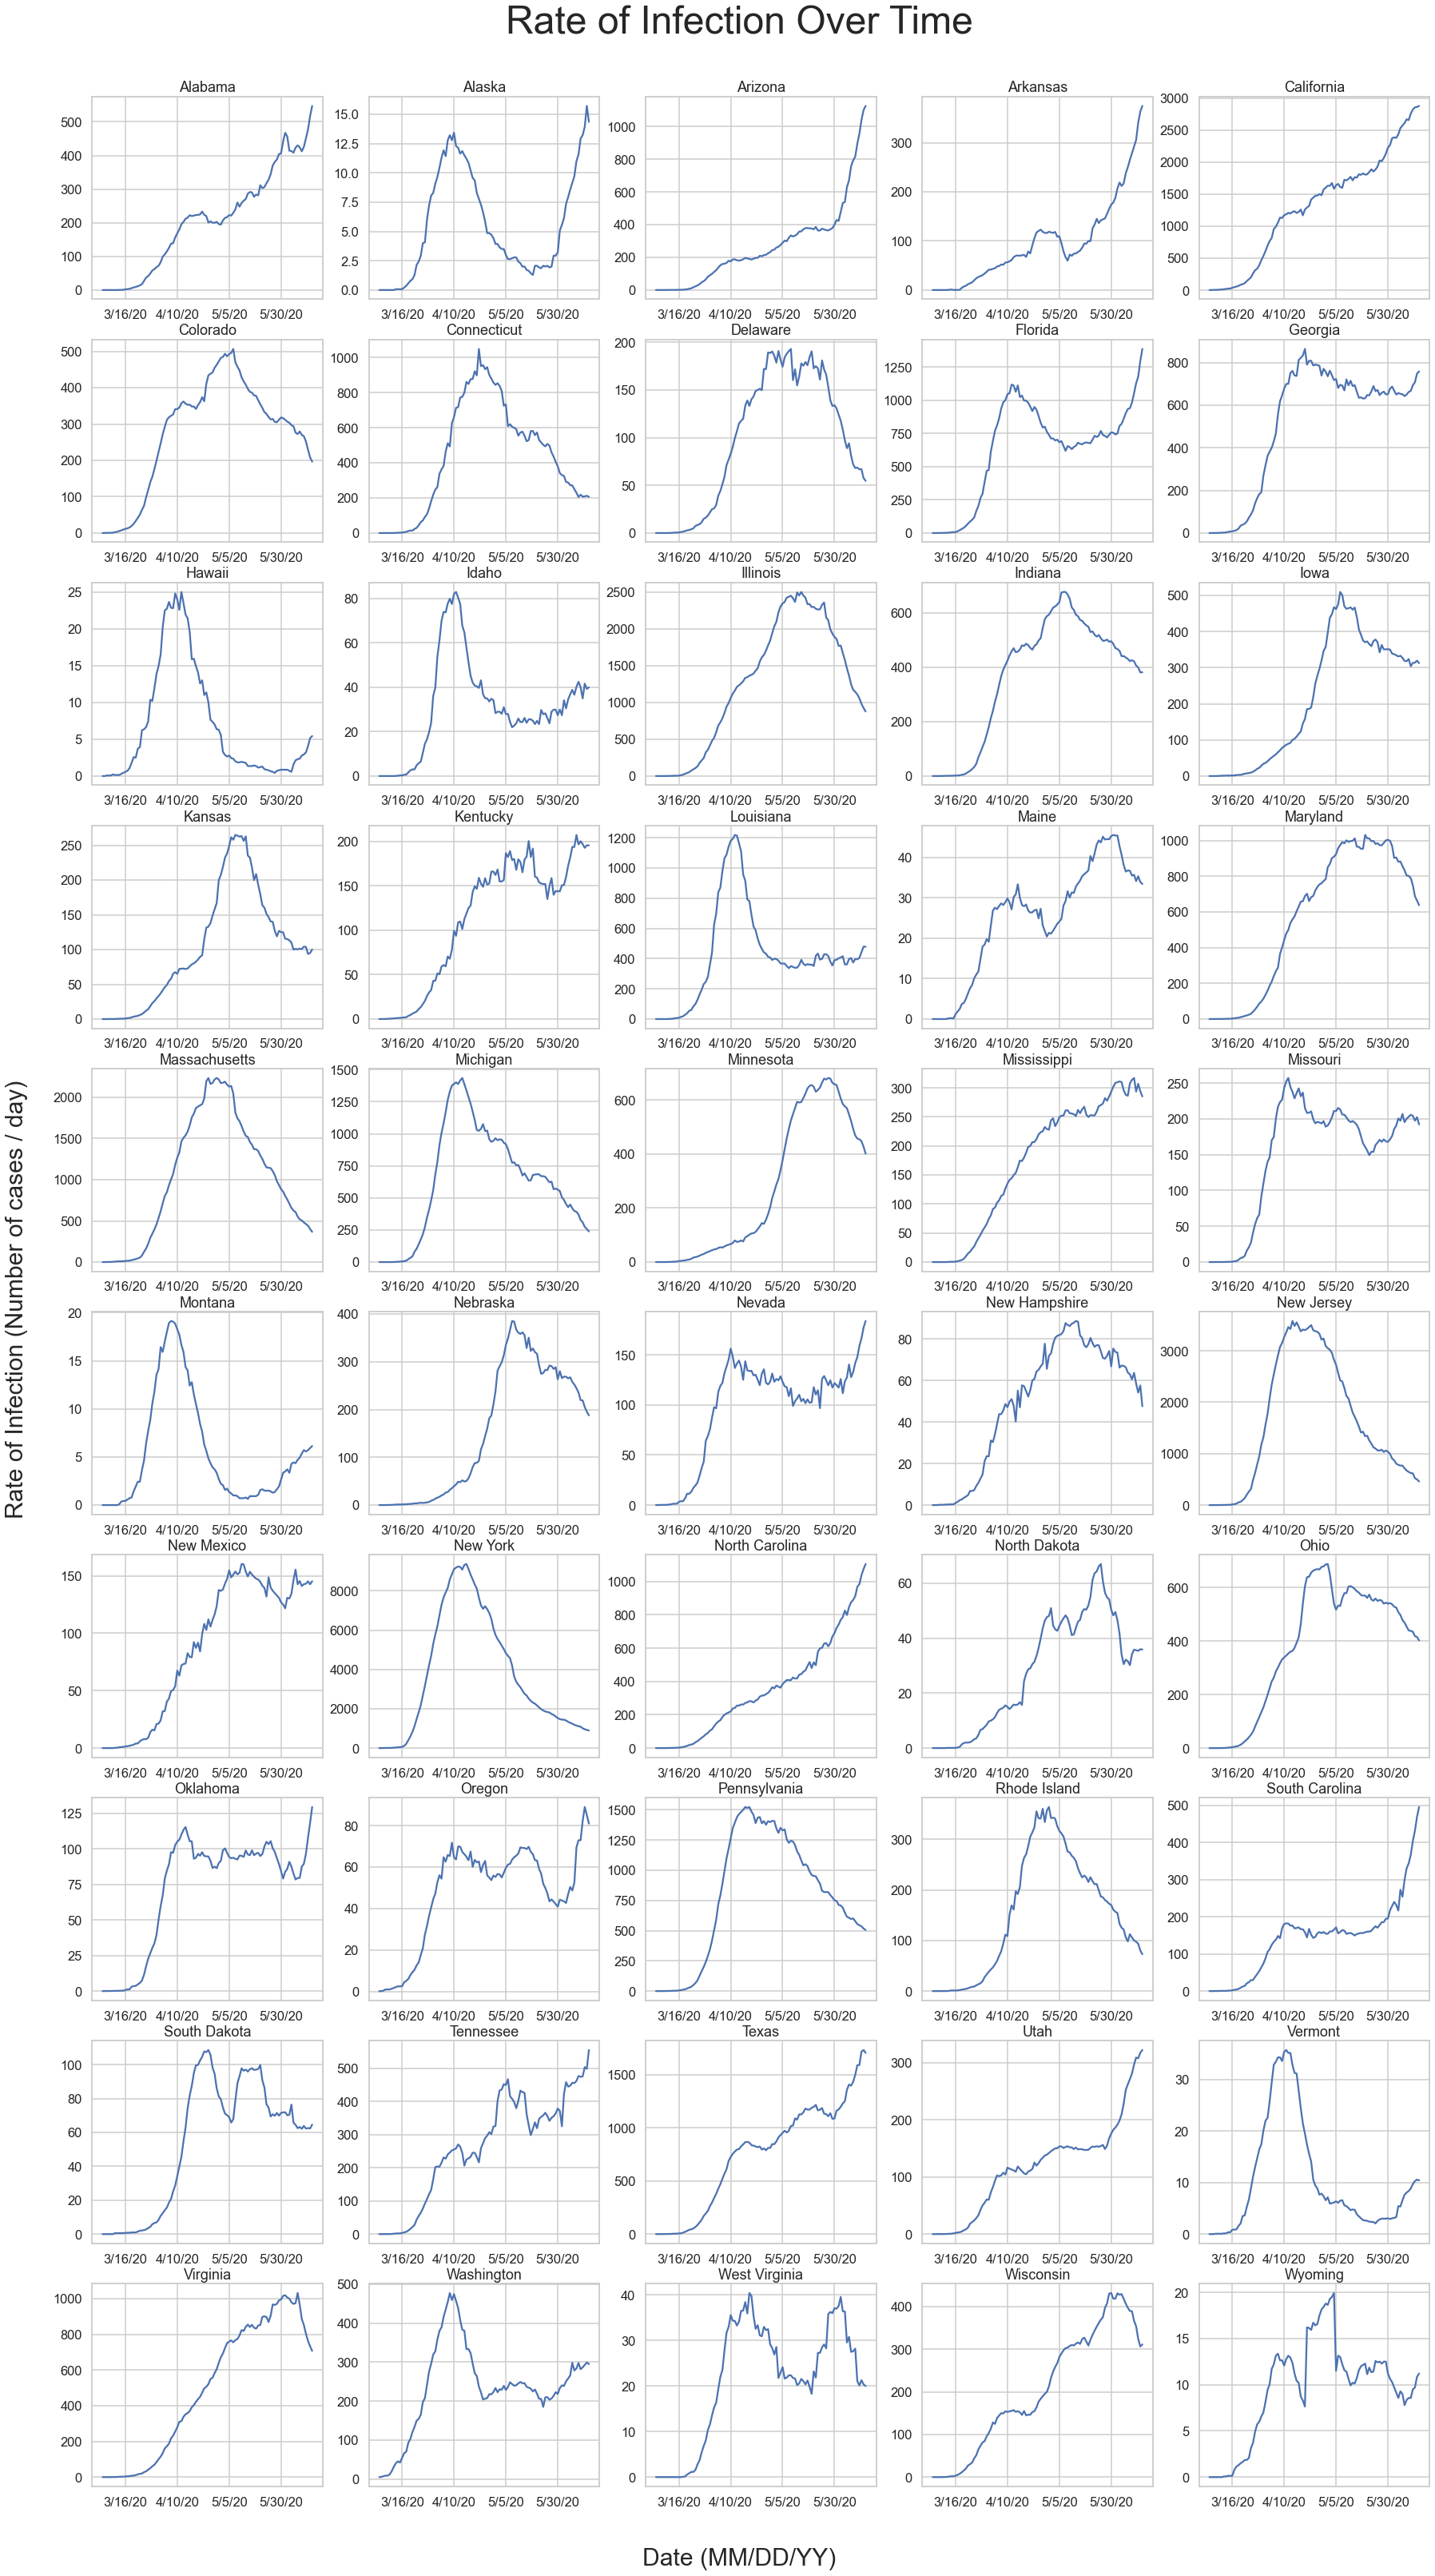

In [33]:
fig, ax = plt.subplots(10, 5, figsize=(30,55))
axes = []
for a in ax:
    axes += list(a)
i = 0
for state, group in df.groupby('Province_State'):
    if state in ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'District of Columbia','Virgin Islands']:
        continue
    print(state)
    a = axes[i]
    state_data = group.iloc[:,40:].sum()
    (state_data.diff(14)/14).plot(ax=a, title=state)
    i += 1
fig.text(0.5, 0.1, 'Date (MM/DD/YY)', ha='center', size=30)
fig.text(0.075, 0.5, 'Rate of Infection (Number of cases / day)', va='center', rotation='vertical', size=30)
fig.text(0.5, 0.9, 'Rate of Infection Over Time', ha='center', size=48)
fig.savefig('rates.png')

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


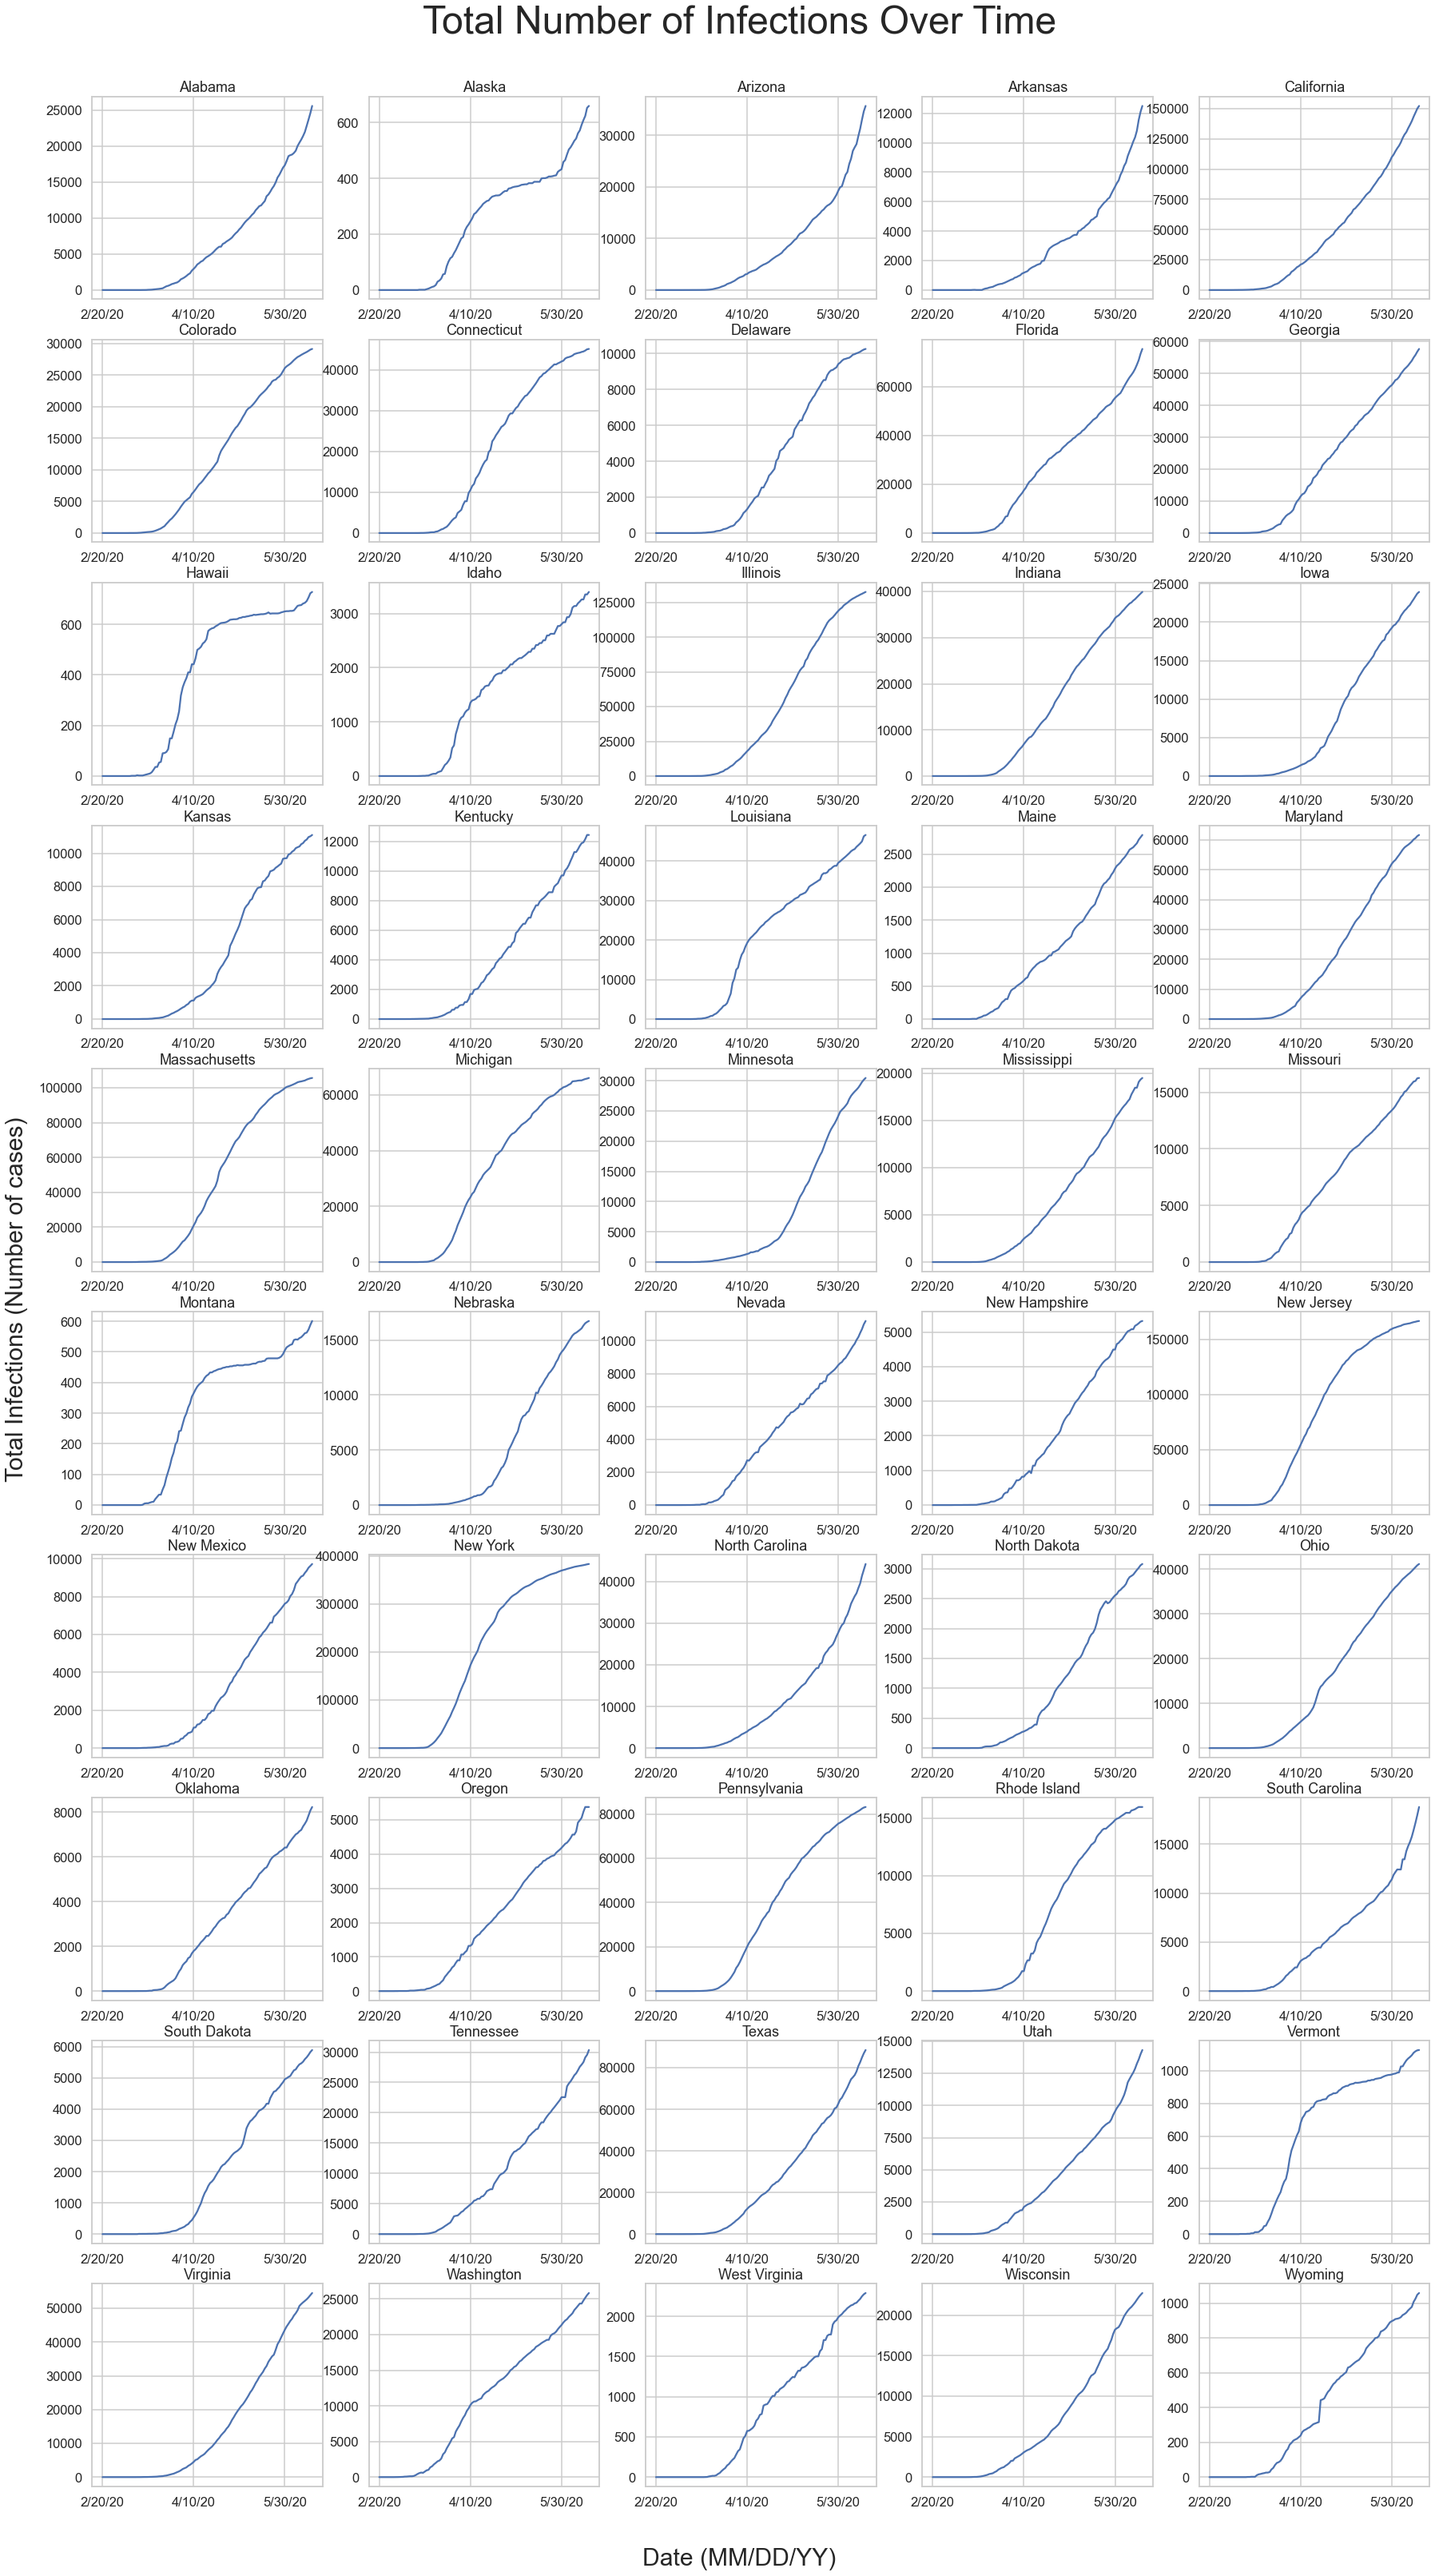

In [34]:
fig, ax = plt.subplots(10, 5, figsize=(30,55))
axes = []
for a in ax:
    axes += list(a)
i = 0
for state, group in df.groupby('Province_State'):
    if state in ['American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'District of Columbia','Virgin Islands']:
        continue
    print(state)
    a = axes[i]
    state_data = group.iloc[:,40:].sum()
    state_data.plot(ax=a, title=state)
    i += 1
fig.text(0.5, 0.1, 'Date (MM/DD/YY)', ha='center', size=30)
fig.text(0.075, 0.5, 'Total Infections (Number of cases)', va='center', rotation='vertical', size=30)
fig.text(0.5, 0.9, 'Total Number of Infections Over Time', ha='center', size=48)
fig.savefig('overall.png')

In [87]:
i

50

In [71]:
test[(test.shift(7) < test) & (test.shift(-7) > test)]

3/12/20      1.0
3/13/20      1.0
3/14/20      2.0
3/15/20      2.0
3/16/20      2.0
3/17/20     11.0
3/18/20     16.0
3/19/20     18.0
3/20/20     21.0
3/21/20     23.0
3/22/20     26.0
3/23/20     26.0
3/24/20     29.0
3/25/20     44.0
3/26/20     52.0
3/27/20     69.0
3/28/20     80.0
3/29/20     84.0
3/30/20     92.0
3/31/20     98.0
4/1/20     114.0
4/2/20     132.0
4/3/20     141.0
4/4/20     164.0
4/5/20     171.0
4/21/20    227.0
4/22/20    226.0
4/23/20    223.0
4/24/20    234.0
4/25/20    230.0
4/26/20    232.0
4/27/20    245.0
5/17/20    168.0
5/18/20    170.0
5/19/20    172.0
5/20/20    156.0
5/21/20    166.0
5/22/20    159.0
dtype: float64